## Grupos 

* **Grupo 0:** Kits alimenticios y productos de primera necesidad 
* **Grupo 1:** Medicamentos e insumos médicos a hospitales
* **Grupo 2:** Compra de mascarillas, guantes y elementos de protección de personal
* **Grupo 3:** Insumos médicos y de protección y desinfección (agrupados por la palabra emergencia e Insumos, esto puede indicar que fueron compras hechas al inicio)
* **Grupo 4:** Kits alimenticios e insumos. Diferenciados del grupo 0 por nombres largos, parecidos y específicos.
* **Grupo 5:** Compra de prendas y accesorios de protección para personal no hospitalario
* **Grupo 6:** Compra insumos de protección, medicinas, bioseguridad. (Agrupados por tener nombres cortos y específicos. Ej. "ADQUISICION DE KIT DE PROTECCION")
* **Grupo 7:** Compra insumos de protección, medicinas, bioseguridad hecho a nivel cantonal, provincial o de parroquia. (Muchos outliers).
* **Grupo 8:** Compras para emergencia sanitaria no limitadas a insumos del grupo 3.  (No contienen la palabra "Insumo",agrupados por la palabra emergencia, esto puede indicar que fueron compras hechas al inicio)
* **Grupo 9:** Compras catalogadas como dispositivos médicos (respiradores, jeringas, etc). (Pueden incluir mascarillas, alcohol, etc con objeto contractual que incluya las palabras "dispositivos médicos"  )
* **Grupo 10:** Compras catalogadas como equipos de protección de personal. Esto puede incluir equipos de desinfección, mascarillas, trajes, etc. (Se diferencian por tener las palabras "EQUIPOS DE PROTECCIÓN")

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
grupos = pd.read_csv('contrataciones_por_proveedor_clustered.csv',sep=';')
grupos

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
0,0,MARTINEZ VELASQUEZ ISIDORO RICARDO,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00047,ADQUISICIÓN DE RESPIRADOR CON EFICIENCIA DE FI...,Unidad,2000000.00,RESPIRADOR CON EFICIENCIA DE FILTRACIÓN MÍNIMA...,4.98,9960000.0,6
1,1,SUMINISTROS MEDICOS MANOSALVAS VILLAGOMEZ MV A...,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00045,ADQUISICIÓN DE 900000 PRUEBAS RÁPIDAS PARA LA ...,Unidad,900000.00,PRUEBAS RÁPIDAS PARA LA DETERMINACIÓN DE ANTIC...,7.15,6435000.0,8
2,2,MILENIO LIMPIEZA Y MANTENIMIENTO S.A. MILIMAN,"GUAYAQUIL SIGLO XXI, FUNDACIÓN MUNICIPAL PARA ...",GSXXI-01-2020,GSXXI-01-2020-00001,PRESTACIÓN DE TRAPEADO Y SERVICIOS COMPLEMENTA...,Unidad,1.00,Limpieza en areas regeneradas,4709260.50,4709260.5,7
3,3,CHICAIZA ALVARADO PEDRO GIOVANNY,MINISTERIO DE SALUD PUBLICA MATRIZ,00026-2020,00026-2020-00006,ADQUISICIÓN DE MASCARILLAS QUIRURGICAS ELASTIC...,Unidad,6840000.00,MASCARILLA QUIRURGICA ELASTICO TAMAÑO ESTANDAR,0.65,4446000.0,2
4,4,CONSORCIO CASUARINA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00032,"EJECUCIÓN DE LOS TRABAJOS CIVILES, ESTRUCTURAL...",Unidad,1.00,NaN,4209650.90,4209650.9,8
...,...,...,...,...,...,...,...,...,...,...,...,...
19613,19613,RODRIGUEZ TORRES WILMER ITALO,GOBIERNO PROVINCIAL DE PICHINCHA,26-DGSG-20,26-DGSG-20-00014,CONTRATO MODIFICATORIO PARA CORREGIR EL ERROR ...,Unidad,0.01,NaN,0.01,0.0,7
19614,19614,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,MUNICIPIO DE PEDERNALES,061-OEAN-GADMCP-2020,061-OEAN-GADMCP-2020-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,0.01,SERVICIOS PRESTADOS POR OTRAS ENTIDADES EXTRAT...,0.00,0.0,6
19615,19615,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GOBIERNO AUTONOMO DESCENTRALIZADO DEL CANTON R...,GADMR-ALC-2020-031-R,GADMR-ALC-2020-031-R-00001,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,Global,1.00,INFORME DUPLICACION DE PUBLICACION DE SITUACIO...,0.00,0.0,6
19616,19616,ACLARATORIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMSD-RWEA-2020-153,GADMSD-RWEA-2020-153-00001,CUMPLIMIENTO A LA CIRCULAR NRO. SERCOP-SERCOP-...,Unidad,1.00,cumplimiento a la Circular Nro. SERCOP-SERCOP-...,0.00,0.0,6


In [2]:
gasto = grupos.groupby('categoria').agg(
    cantidad_prom = pd.NamedAgg(column='Cantidad',aggfunc='mean'),
    total = pd.NamedAgg(column='Precio total',aggfunc='sum'),
    total_promedio = pd.NamedAgg(column='Precio total',aggfunc='mean'))
gasto

,cantidad_prom,total,total_promedio
categoria,,,
0,1973.592050,12289184.31,5956.948284
1,4129.951203,18931838.78,12654.972447
2,26134.704457,7951280.47,14890.038333
3,3880.271080,7086812.96,5241.725562
4,962.690909,45545.29,828.096182
5,2002.661134,10342563.79,6899.642288
6,3061.789510,44321862.44,10336.255233
7,2010.021885,38026559.36,11063.881106
8,32542.054469,53941476.44,20907.549008


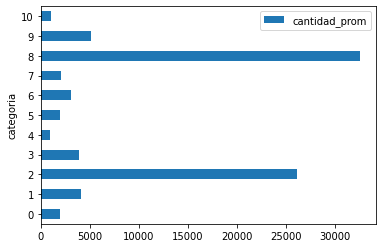

In [3]:
gasto = grupos.groupby('categoria').agg(
    cantidad_prom = pd.NamedAgg(column='Cantidad',aggfunc='mean')).plot.barh()

Grupo 8: Compras para emergencia sanitaria no limitadas a insumos del grupo 3. (No contienen la palabra "Insumo",agrupados por la palabra emergencia, esto puede indicar que fueron compras hechas al inicio)

Grupo 2: Compra de mascarillas, guantes y elementos de protección de personal

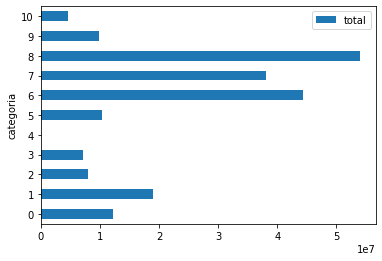

In [4]:
gasto = grupos.groupby('categoria').agg(
    total = pd.NamedAgg(column='Precio total',aggfunc='sum')).plot.barh()

Grupo 4: Kits alimenticios e insumos. Diferenciados del grupo 0 por nombres largos, parecidos y específicos.

Maximo precio unitario de kits alimenticios durante cuarentena:  41.07
Minimo precio unitario de kits alimenticios durante cuarentena:  0.05
Promedio precio unitario de kits alimenticios durante cuarentena:  5.506909090909091


,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
3330,3330,SARMIENTO PESANTEZ RICHARD ALFONSO,EMPRESA PUBLICA MUNICIPAL DE AGUA POTABLE ALCA...,RES-NRO-26-EP-EMAPAC,RES-NRO-26-EP-EMAPAC-00001,EL CONTRATISTA SE OBLIGA CON LA CONTRATANTE A ...,Unidad,210.0,CAJA DE 5O UNIDADES DE MASCARILLAS DESECHABLES...,24.00,5040.0,4
4616,4616,MOROCHO YAURIPOMA CLAUDIO KLEVER,GOBIERNO MUNICIPAL DE MERA,EMERG-3-A-GADMCM2020,EMERG-3-A-GADMCM2020-00013,"1300 KITS ALIMENTARIOS, CADA KIT SERÁ ENTREGAD...",Libra,6500.0,Según Requerimiento,0.45,2925.0,4
4897,4897,MOROCHO YAURIPOMA CLAUDIO KLEVER,GOBIERNO MUNICIPAL DE MERA,EMERG-3-A-GADMCM2020,EMERG-3-A-GADMCM2020-00013,"1300 KITS ALIMENTARIOS, CADA KIT SERÁ ENTREGAD...",Acre,1300.0,TRIPACK,2.00,2600.0,4
5305,5305,MOROCHO YAURIPOMA CLAUDIO KLEVER,GOBIERNO MUNICIPAL DE MERA,EMERG-3-A-GADMCM2020,EMERG-3-A-GADMCM2020-00013,"1300 KITS ALIMENTARIOS, CADA KIT SERÁ ENTREGAD...",Unidad,2600.0,Tinapa Real,0.85,2210.0,4
5385,5385,MOROCHO YAURIPOMA CLAUDIO KLEVER,GOBIERNO MUNICIPAL DE MERA,EMERG-3-A-GADMCM2020,EMERG-3-A-GADMCM2020-00013,"1300 KITS ALIMENTARIOS, CADA KIT SERÁ ENTREGAD...",Acre,1300.0,Funda de 2kg,1.65,2145.0,4


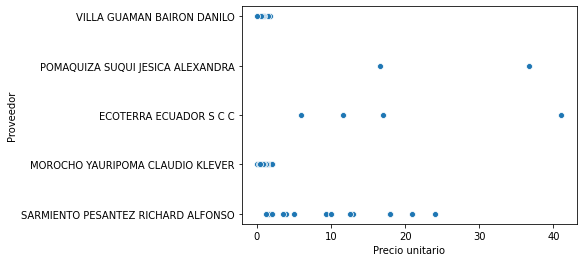

In [5]:
c4 = grupos[grupos['categoria']==4]
print('Maximo precio unitario de kits alimenticios durante cuarentena: ', c4['Precio unitario'].max())
print('Minimo precio unitario de kits alimenticios durante cuarentena: ', c4['Precio unitario'].min())
print('Promedio precio unitario de kits alimenticios durante cuarentena: ', c4['Precio unitario'].mean())

sns.scatterplot(data=c4, x='Precio unitario', y="Proveedor")
c4.head()

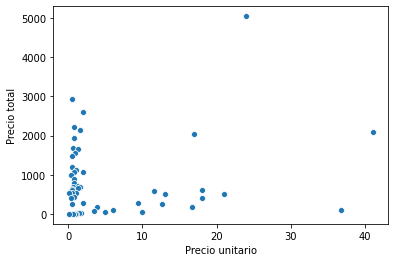

In [6]:
sns.scatterplot(data=c4, x='Precio unitario', y="Precio total")

Grupo 6: Compra insumos de protección, medicinas, bioseguridad. (Agrupados por tener nombres cortos y específicos. Ej. "ADQUISICION DE KIT DE PROTECCION")

Grupo 7: Compra insumos de protección, medicinas, bioseguridad hecho a nivel cantonal, provincial o de parroquia. (Muchos outliers).

Grupo 8: Compras para emergencia sanitaria no limitadas a insumos del grupo 3. (No contienen la palabra "Insumo",agrupados por la palabra emergencia, esto puede indicar que fueron compras hechas al inicio)

# Grupo 7

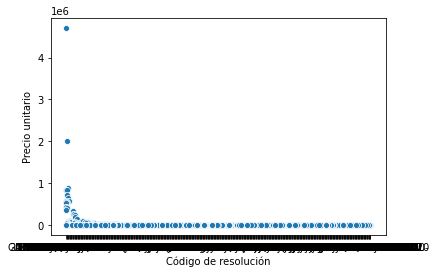

In [10]:
c7 = grupos[grupos['categoria']==7]
sns.scatterplot(data=c7, x='Código de resolución', y="Precio unitario")

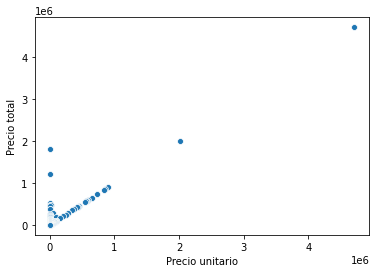

In [8]:
sns.scatterplot(data=c7, x='Precio unitario', y="Precio total")

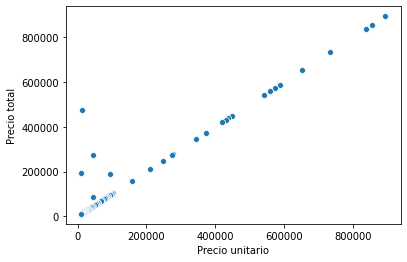

In [19]:
c71 = c7[(c7['Precio unitario']<1000000) & (c7['Precio unitario']>10000)]

sns.scatterplot(data=c71, x='Precio unitario', y="Precio total")

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
328,328,EQUIPOS Y PRODUCTOS MEDICOS EPM S.A.,GOBIERNO PROVINCIAL DEL GUAYAS,GPG-PG-014-2020-,GPG-PG-014-202000013,ADQUISICION DE 19 VENTILADORES PNEUMATICOS ALI...,Unidad,19.0,VENTILADOR PNEUMATICO ALIMENTADO POR PRESION D...,4950.00,94050.00,7
579,579,ROCHE ECUADOR S.A.,INSTITUTO NACIONAL DE INVESTIGACIÓN EN SALUD P...,INSPI-2020-0020-R,INSPI-2020-0020-R-00012,ADQUISICION DE KITS PARA LA DETECCION DEL COVI...,Unidad,50.0,kit Modulo para detección del gen E del Wuhan ...,1056.00,52800.00,7
753,753,"ASOCIACION DE SERVICIOS DE ALIMENTACION, LIMPI...",GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL FR...,091-AGADMFO-2020,091-AGADMFO-2020-00008,SERVICIO DE ALIMENTACIÓN PARA PACIENTES POSITI...,Unidad,4.0,SEGUN PLIEGOS,9979.20,39916.80,7
882,882,COMPAÑIA DE TRANSPORTE MIXTO VENTANAS CITRAMIX...,EMPRESA PUBLICA MUNICIPAL DE TRANSPORTE TERRES...,QUEVIALEP-RA-GG-JVI-,QUEVIALEP-RA-GG-JVI00010,SERVICIO DE ALQUILER DE CUATRO CAMIONETAS PARA...,Unidad,12.0,SERVICIO DE ALQUILER DE CUATRO CAMIONETAS por ...,2700.00,32400.00,7
883,883,COMPAÑIA DE TRANSPORTE MIXTO VENTANAS CITRAMIX...,EMPRESA PUBLICA MUNICIPAL DE TRANSPORTE TERRES...,QUEVIALEP-RA-GG-JVI-,QUEVIALEP-RA-GG-JVI00011,SERVICIO DE ALQUILER DE CUATRO CAMIONETAS PARA...,Unidad,12.0,SERVICIO DE ALQUILER DE CUATRO CAMIONETAS PARA...,2700.00,32400.00,7
...,...,...,...,...,...,...,...,...,...,...,...,...
7507,7507,COMPAÑIA DE TRANSPORTE ESCOLAR E INSTITUCIONAL...,CORPORACION ELECTRICA DEL ECUADOR CELEC EP,TPI-RES0053-20,TPI-RES0053-20-00008,SERVICIO DE TRANSPORTE PARA EL TRASLADO DEL PE...,Unidad,1.0,SERVICIO DE TRANSPORTE PARA EL TRASLADO DEL P...,1090.00,1090.00,7
7561,7561,QUEZADA QUEZADA KARLA CRISTINA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,A-ESCOVID19-003-GAD,A-ESCOVID19-003-GAD-00008,ADQUISICIÓN UN ARCO PARA DESINFECCIÓN DE VEHÍC...,Unidad,1.0,Arco de desinfección Vehículos 4x5 m con senso...,1071.43,1071.43,7
7668,7668,CASTILLO GUERRERO DAVID SANTIAGO,DIRECCION DISTRITAL 01D02 - PARROQUIAS URBANAS...,DD01D02S-001-2020,DD01D02S-001-2020-00025,CONTRATACION DE FUMIGACION PARA ATENDER EL COV...,Unidad,1.0,FUMIGACION DE CENTROS DE SALUD,1040.00,1040.00,7
7690,7690,PINTA PINTA VICTOR MANUEL,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,013-A-GADM-Y-2020,013-A-GADM-Y-2020-00005,ADQUISICIÓN DE CANECAS DE ALCOHOL POTABLE Y CL...,NaN,1.0,alcohol potable y cloro líquido,1030.40,1030.40,7


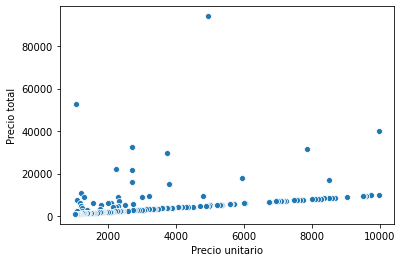

In [21]:
c72 = c7[(c7['Precio unitario']<10000)&(c7['Precio unitario']>1000)]
sns.scatterplot(data=c72, x='Precio unitario', y="Precio total")
c72

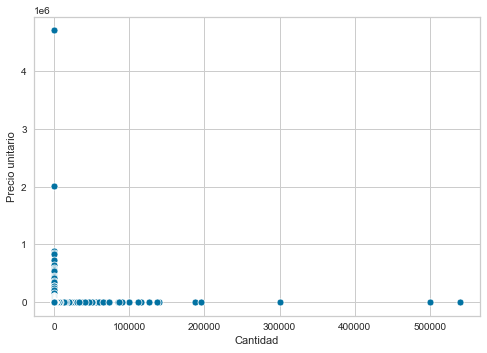

In [76]:
sns.scatterplot(data=c7, x='Cantidad', y="Precio unitario")

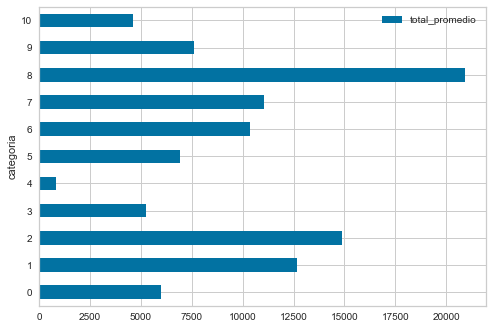

In [61]:
gasto = grupos.groupby('categoria').agg(
    total_promedio = pd.NamedAgg(column='Precio total',aggfunc='mean')).plot.barh()

# Grupo 2 y 8

In [104]:
c8 = grupos[grupos['categoria']==8]
c2 = grupos[grupos['categoria']==2]

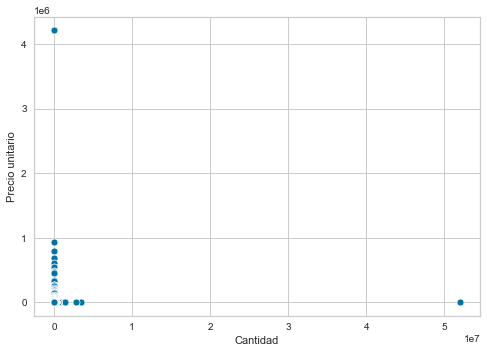

In [105]:
sns.scatterplot(data=c8, x='Cantidad', y="Precio unitario")

In [116]:
c81 = c8[c8['Precio unitario']>100000]
c81 = c81[c81['Precio unitario']<4209650]
c81

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
16,16,INTERBIOTIK CIA. LTDA.,HOSPITAL GENERAL MACHALA,IESS-DG-AL-2020-32GM,IESS-DG-AL-2020-32GM-00001,ADQUISICIÓN DE MEDICAMENTOS CORRESPONDIENTES A...,Global,1.0,ADQUISICIÓN DE MEDICAMENTOS CORRESPONDIENTES A...,927994.60,927994.60,8
24,24,MEGA SANTAMARIA S.A.,GOBIERNO AUTÓNOMO DESCENTRALIZADO DEL DISTRITO...,014-UPMSJ-DU-2020,014-UPMSJ-DU-2020-00001,ADQUISICIÓN DE ALIMENTOS DE PRIMERA NECESIDAD ...,Unidad,1.0,De acuerdo a convocatoria,790670.00,790670.00,8
30,30,GARCIA VILLAMAR MARJORIE YOMAYRA,MUNICIPALIDAD DE GUAYAQUIL,CE-MIMG-003-2020,CE-MIMG-003-2020-00008,"ADQUISICIÓN DE RESPIRADORES UCI, PARA SER UTIL...",Unidad,1.0,NaN,685880.00,685880.00,8
36,36,MORENO VACA FRANCISCO ALEJANDRO,MINISTERIO DE TRANSPORTE,005-2020,005-2020-00001,SERVICIO DE MANTENIMIENTO EMERGENTE CORRECTIVO...,Unidad,1.0,SERVICIOS DE MANTENIMIENTO EMERGENTE,610287.80,610287.80,8
46,46,VILLACAPRIA CIA. LTDA.,EMPRESA PÚBLICA METROPOLITANA DE GESTIÓN INTEG...,EP-GGE-CJU-2020-011,EP-GGE-CJU-2020-011-00001,SERVICIO DE TRATAMIENTO EMERGENTE DE LOS LIXIV...,Unidad,1.0,Ver documentos anexos,549675.00,549675.00,8
61,61,CORPORACION FAVORITA C.A.,GOBIERNO AUTONOMO DESCENTRALIZADO DE LA PROVIN...,010-GADPE-P-GAL-2020,010-GADPE-P-GAL-2020-00001,ADQUSICION DE KITS COMPLEMENTARIOS DE ALIMENTO...,Unidad,1.0,INDICADO EN LOS TDR,478380.00,478380.00,8
64,64,MACHUCA ZAMBRANO BERMAN MOISES,EMPRESA PUBLICA MUNICIPAL DE AGUA POTABLE Y AL...,EMAPA-EP-GG-2020-007,EMAPA-EP-GG-2020-007-00001,REHABILITACION Y REPOTENCIACION DE LA PLANTA P...,Global,1.0,NaN,464655.06,464655.06,8
68,68,COMERCIALIZADORA INSUMOS HOSPITALARIOS MEDICOS...,HOSPITAL GENERAL DR. LIBORIO PANCHANA SOTOMAYOR,058-2020,058-2020-00005,ADQUISICIÓN DE MEDICAMENTOS URGENTES POR EMERG...,Unidad,1.0,NaN,455663.34,455663.34,8
95,95,EXPORTNEGOS S.A.,CENTRO CLINICO QUIRURGICO AMBULATORIO HOSPITAL...,IESS-HD-SV-2020-0014,IESS-HD-SV-2020-0014-00002,"ADQUISICIÓN DE GEL ANTISEPTICO, MASCARILLA N95...",Unidad,1.0,"ADQUISICIÓN DE GEL ANTISEPTICO, MASCARILLA N95...",345361.00,345361.00,8
100,100,SANTANA ROCA PAULINA KAHORY,GOBIERNO PROVINCIAL DEL GUAYAS,GPG-PG-014-2020-,GPG-PG-014-202000001,ADQUISICIÓN DE KIT DE ALIMENTOS NO PERECIBLES ...,Unidad,1.0,ADQUISICION DE KIT DE ALIMENTOS,323500.00,323500.00,8


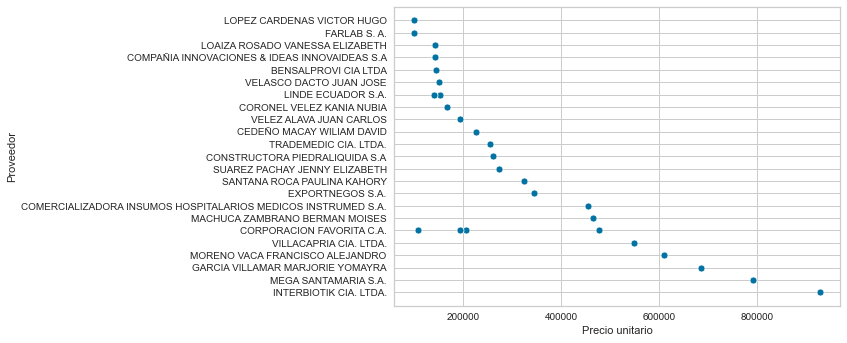

In [115]:
sns.scatterplot(data=c81, x='Precio unitario', y="Proveedor")

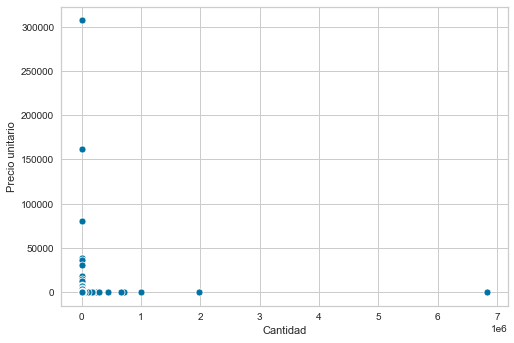

In [117]:
sns.scatterplot(data=c2, x='Cantidad', y="Precio unitario")

In [120]:
c21 = c2[c2['Precio unitario']>10000]
#c21 = c81[c81['Precio unitario']<4209650]
c21

,Unnamed: 0,Proveedor,Entidad Contratante,Código de resolución,Código de contratación,Objeto contractual,Unidad de medida,Cantidad,Descripción compra por ítem,Precio unitario,Precio total,categoria
104,104,FUENTES JARA MIRYAM DORA,CENTRO CLINICO QUIRURGICO AMBULATORIO HOSPITAL...,IESS-HD-SV-2020-0014,IESS-HD-SV-2020-0014-00001,"ADQUISICIÓN DE BATAS MANGA LARGA TALLA G, GUAN...",Unidad,1.0,"ADQUISICIÓN DE BATAS MANGA LARGA TALLA G, GUAN...",307187.50,307187.50,2
203,203,VOSCORP S.A.,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL ...,2020-005-RA-GADPEO-C,2020-005-RA-GADPEO-C-00004,"ADQUISICIÓN DE BATAS DE PROTECCIÓN DESECHABLE,...",Unidad,1.0,INSUMOS MÉDICOS,162400.00,162400.00,2
379,379,LOZADA LOPEZ WILSON JOSELITO,MUNICIPIO DE MONTECRISTI,0019-WWAP-GADMCM2020,0019-WWAP-GADMCM2020-00003,ADQUISICIÓN DE INSUMOS PARA PREVENIR CONTAGIO ...,Unidad,1.0,"MASCARILLAS, GUANTES, TRAJES, EPP COMPLETOS, T...",80640.00,80640.00,2
770,770,SANCHEZ CONDOR MARIA DEL CARMEN,CEFAS-PATRONATO DEL GAPMS,001-CEFAS-2020,001-CEFAS-2020-00001,PROVISIÒN DE INSUMOS DE PROTECCION PERSONAL ...,Global,1.0,DE ACUERDO A LAS ESPECIFICACIONES TECNICAS.,38582.67,38582.67,2
774,774,OJEDA OJEDA CESAR PATRICIO,MUNICIPIO DE LOJA,0027-AL-2020,0027-AL-2020-00006,GUANTES LATEX TALLA LGUANTES DE EXAMINACION T...,Unidad,1.0,GUANTES LATEX TALLA L GUANTES DE EXAMINACION ...,38250.00,38250.00,2
796,796,PROMOSTOCK S.A,MUNICIPIO DE LOJA,0027-AL-2020,0027-AL-2020-00002,"COMPRA DE MASCARILLAS DE SEGURIDAD N95, 3M, MA...",Unidad,1.0,"MASCARILLAS DE SEGURIDAD N95 3M, MASCARILLAS D...",36600.00,36600.00,2
912,912,PAREDES SALTOS MARIA VICTORIA,GOBIERNO AUTONOMO DESCENTRALIZADO MUNICIPAL DE...,GADMP-ADM-2020-0034,GADMP-ADM-2020-0034-00003,ADQUISICIÓN DE EQUIPOS DE PROTECCIÓN: MASCARIL...,Unidad,1.0,FORMULARIO,30650.00,30650.00,2
1416,1416,DELGADO CASTILLO DAVID ALEJANDRO,GOBIERNO MUNICIPAL DE SAN JACINTO DE YAGUACHI,GADMSJY-001-2020,GADMSJY-001-2020-00004,ADQUISICION DE 5000 MASCARILLAS KN95 5 CAPAS Y...,Unidad,1.0,5000 KN95 Y 20000 QUIRURGICAS,18000.00,18000.00,2
1598,1598,ROSILLO UGUÑA MAYRA ALEXANDRA,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,001-GADPZCH-2020,001-GADPZCH-2020-00013,LA CONTRATISTA SE OBLIGA CON EL GOBIERNO AUTÓN...,Unidad,1.0,500 KIT DE EQUIPOS QUIRURGICOS,14901.60,14901.60,2
1724,1724,ARMIJOS BERRU MARICELA PATRICIA,GOBIERNO AUTONOMO DESCENTRALIZADO PROVINCIAL D...,001-GADPZCH-2020,001-GADPZCH-2020-00011,LA CONTRATISTA SE OBLIGA CON EL GOBIERNO AU...,Unidad,1.0,"300 TRAJES DESECHABLES , 5000 MASCARILLAS DESE...",13093.36,13093.36,2
